## EDA
Raw data 기본 분석: `whisky_reviews.csv`, `whisky_qna.csv`

<img style="float: right;" src="../img/logo.png" width="120"><br>

<div style="text-align: right"> <b>Kwang Myung Yu</b></div>
<div style="text-align: right"> Initial issue : 2025.11.16 </div>
<div style="text-align: right"> last update : 2025.11.16 </div>

개정 이력  
- `2025.11.16` : 노트북 초기 생성 

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import os
import pandas as pd
import numpy as np
from rag_pkg.utils.path import RAW_DATA_PATH, INTERMEDIATE_DATA_PATH, PROCESSED_DATA_PATH

In [3]:
qna_data_path = RAW_DATA_PATH / "whisky_qnas.csv"
review_data_path = RAW_DATA_PATH / "whisky_reviews.csv"

qnas = pd.read_csv(qna_data_path)
reviews = pd.read_csv(review_data_path)

In [4]:
reviews.head()

,Whisky Name,Link,Tags,Nose Score,Nose Comment,Taste Score,Taste Comment,Finish Score,Finish Comment
0,Springbank1966,https://www.whiskybase.com/whiskies/whisky/132...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Springbank10-year-old,https://www.whiskybase.com/whiskies/whisky/416...,Green-House,94.0,The nose is full of aromatic power. We still h...,96.0,"On the palate it is surprisingly fresh and ""al...",95.0,"Long finish on liquorice, camphor, smoke, ash ..."
2,Ardbeg1967 Kb,https://www.whiskybase.com/whiskies/whisky/230...,NaN,NaN,"Peat, nuts, celery, well integrated, leather, ...",NaN,"Leather, shoe polish, sherry, mints, cigar, sm...",NaN,"Banana, smoke, citrus, black tea, long and nutty"
3,Springbank35-year-old,https://www.whiskybase.com/whiskies/whisky/110...,"Chocolate,Dried Fruit,Fresh Fruit,New Wood,Oil...",100.0,"Fresh, rich, intensive, complex, fruity, plums...",99.0,"Oh yes, smooth, warm, sweet oak wood, little v...",98.0,"Long, warm, very smooth oak lingering - nevere..."
4,Springbank1966,https://www.whiskybase.com/whiskies/whisky/143...,NaN,NaN,Like a chimera of Genting King and Honey Rum. ...,NaN,"Oceanic fino Shirley. Rhubarb, ginkgo fruit, n...",NaN,"Long-term, coffee, salt, fino, black pepper, c..."


In [7]:
reviews.shape

(985, 9)

<Axes: >

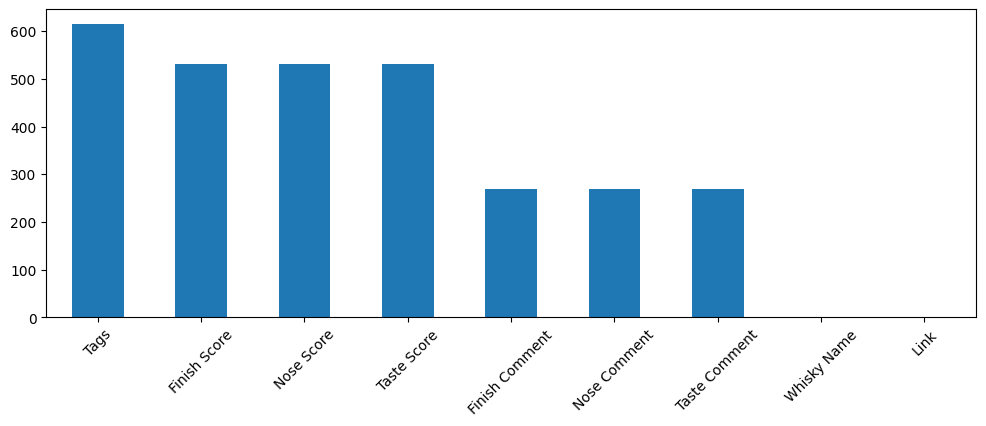

In [11]:
reviews.isnull().sum().sort_values(ascending=False).plot(kind='bar', rot=45, figsize=(12, 4))

In [13]:
reviews.nunique()/reviews.shape[0]

Whisky Name       0.585787
Link              1.000000
Tags              0.261929
Nose Score        0.017259
Nose Comment      0.724873
Taste Score       0.015228
Taste Comment     0.724873
Finish Score      0.017259
Finish Comment    0.723858
dtype: float64

In [17]:
reviews.loc[reviews["Whisky Name"]=="Brora1972"]

,Whisky Name,Link,Tags,Nose Score,Nose Comment,Taste Score,Taste Comment,Finish Score,Finish Comment
5,Brora1972,https://www.whiskybase.com/whiskies/whisky/953...,"Leathery,Oily,Toasted",96.0,"Famyard smells galore, hay, cowbarns, animal s...",95.0,At first you get a lovely bag of fruit gums th...,95.0,"Good length, remaining composed, absolutely no..."
8,Brora1972,https://www.whiskybase.com/whiskies/whisky/182...,NaN,94.0,"Vanilla, honeydew, dirty and leathery notes, o...",94.0,"Oily, creamy, little sirupy, good sweetness, c...",93.0,"Medium long, warm, spicy, peaty, citric, honey"
66,Brora1972,https://www.whiskybase.com/whiskies/whisky/953...,NaN,93.0,I left this in the glass for 10 minutes or so ...,94.0,"Bags of really zesty fruit, oh hang on, here i...",94.0,"Long, peppery, moreish with a fruit blast in t..."


<Axes: xlabel='Whisky Name'>

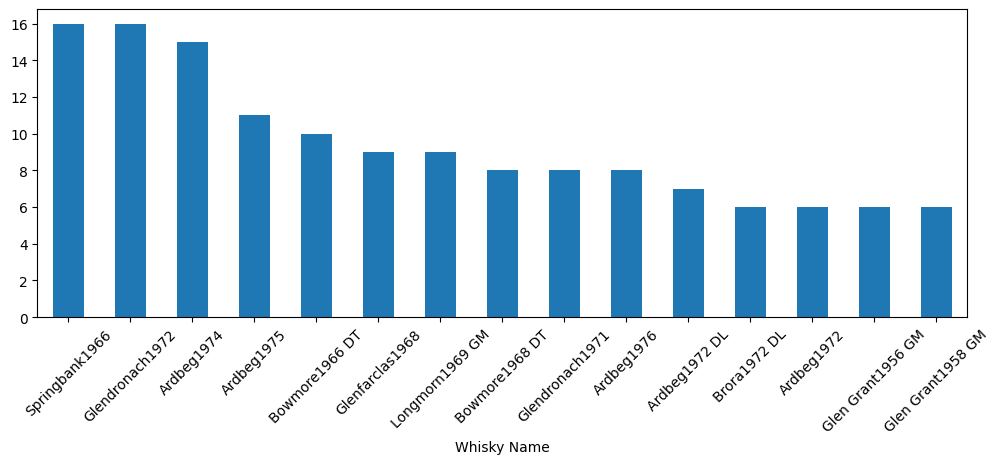

In [20]:
reviews["Whisky Name"].value_counts()[:15]
reviews["Whisky Name"].value_counts()[:15].plot(kind='bar', rot=45, figsize=(12, 4))

In [21]:
reviews.loc[reviews["Whisky Name"]=="Springbank1966"]

,Whisky Name,Link,Tags,Nose Score,Nose Comment,Taste Score,Taste Comment,Finish Score,Finish Comment
0,Springbank1966,https://www.whiskybase.com/whiskies/whisky/132...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Springbank1966,https://www.whiskybase.com/whiskies/whisky/143...,NaN,NaN,Like a chimera of Genting King and Honey Rum. ...,NaN,"Oceanic fino Shirley. Rhubarb, ginkgo fruit, n...",NaN,"Long-term, coffee, salt, fino, black pepper, c..."
46,Springbank1966,https://www.whiskybase.com/whiskies/whisky/629...,NaN,NaN,"Fresh (sea breeze), fruity, complex.",NaN,"Full, strong and very tasty, smooth vanilla an...",NaN,"Long and warming, with a fruity mix of vanilla..."
52,Springbank1966,https://www.whiskybase.com/whiskies/whisky/143...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Springbank1966,https://www.whiskybase.com/whiskies/whisky/144...,"Chocolate,Citric,Coal-gas,Cooked Fruit,Fresh F...",98.0,Fantastic bourbon nose with dozens of flavours...,97.0,"Very spicy, full of layers,divine complexity. ...",98.0,"Exceptional, fruity, peaty, dry, Endless .. wh..."
161,Springbank1966,https://www.whiskybase.com/whiskies/whisky/880...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Springbank1966,https://www.whiskybase.com/whiskies/whisky/143...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,Springbank1966,https://www.whiskybase.com/whiskies/whisky/144...,NaN,NaN,Very complex nose with fruity sweetness of pea...,NaN,Now more on oranges and tangerines. Dried apri...,NaN,Quite long. Cinnamon. A little ginger. Clove. ...
280,Springbank1966,https://www.whiskybase.com/whiskies/whisky/144...,NaN,95.0,NaN,95.0,NaN,94.0,NaN
333,Springbank1966,https://www.whiskybase.com/whiskies/whisky/144...,NaN,NaN,"Extremely sweet and rich, Christmas cake with ...",NaN,"Uprising tropical fruits and stone fruits, ext...",NaN,"A fruity finish, huge mango and peaches, pickl..."


In [23]:
reviews.loc[reviews["Whisky Name"].str.startswith("Springbank", na=False)].head(20)

,Whisky Name,Link,Tags,Nose Score,Nose Comment,Taste Score,Taste Comment,Finish Score,Finish Comment
0,Springbank1966,https://www.whiskybase.com/whiskies/whisky/132...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Springbank10-year-old,https://www.whiskybase.com/whiskies/whisky/416...,Green-House,94.0,The nose is full of aromatic power. We still h...,96.0,"On the palate it is surprisingly fresh and ""al...",95.0,"Long finish on liquorice, camphor, smoke, ash ..."
3,Springbank35-year-old,https://www.whiskybase.com/whiskies/whisky/110...,"Chocolate,Dried Fruit,Fresh Fruit,New Wood,Oil...",100.0,"Fresh, rich, intensive, complex, fruity, plums...",99.0,"Oh yes, smooth, warm, sweet oak wood, little v...",98.0,"Long, warm, very smooth oak lingering - nevere..."
4,Springbank1966,https://www.whiskybase.com/whiskies/whisky/143...,NaN,NaN,Like a chimera of Genting King and Honey Rum. ...,NaN,"Oceanic fino Shirley. Rhubarb, ginkgo fruit, n...",NaN,"Long-term, coffee, salt, fino, black pepper, c..."
7,Springbank1965 CA,https://www.whiskybase.com/whiskies/whisky/376...,NaN,NaN,How dark can a whisky be! Dried fruits of figs...,NaN,Thick and oily. Sweet sherry (PX?). Bitter ora...,NaN,Long and warming. Clove and nutmeg. Cinnamon. ...
15,Springbank1969 SV,https://www.whiskybase.com/whiskies/whisky/157...,"Citric,Mossy,Cooked Fruit,Cooked Mash,Fresh Fr...",96.0,"Extremely creamy. Crême brûlée, coconut, canta...",95.0,"Coconut, apricot jam, honey, vanilla, leather,...",95.0,"Vanilla pudding, apricot, honey, coconut, cara..."
17,Springbank1963 CA,https://www.whiskybase.com/whiskies/whisky/112...,"Dried Fruit,Oily,Old Wood,Tobacco",97.0,The nose is ultra concentrated. It's superb be...,97.0,"In the mouth, it is the molasses that opens th...",96.0,"The finish is long (not surprisingly), in the ..."
21,Springbank1972,https://www.whiskybase.com/whiskies/whisky/144...,NaN,NaN,"Very fresh, rich, complex, fruity, citrus frui...",NaN,"Wow, what a blast! - so punchy and powerful, i...",NaN,"Long and burning, there are coming our more an..."
31,Springbank1965 MI,https://www.whiskybase.com/whiskies/whisky/877...,NaN,NaN,Intriguing old and dusty nose with notes of ol...,NaN,The sherry sweetness continues with stewed fru...,NaN,Long and drying with black pepper and a little...
33,Springbank1962,https://www.whiskybase.com/whiskies/whisky/143...,"Chocolate,Dried Fruit,Sherried,Tobacco,Citric,...",96.0,What a nose! Say it's reduced to 46%!\nAn impr...,95.0,In the mouth we continue in the momentum of th...,95.0,"Long finish on cocoa powder, dark chocolate fo..."
